In [4]:
import numpy

# Make a function that packages this up to be applied to diff numbers
fahrenheit_val = 99
celsius_val = ((fahrenheit_val - 32) * (5/9))
print(celsius_val)

37.22222222222222


In [9]:
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))

print('freezing point of water:', fahr_to_celsius(32), 'C')
print('boiling point of water:', fahr_to_celsius(212), 'C')

freezing point of water: 0.0 C
boiling point of water: 100.0 C


In [12]:
# Write a function to convert celsius to kelvin
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15
print('freezing point of water:', celsius_to_kelvin(0), "Kelvin")

freezing point of water: 273.15 Kelvin


In [13]:
# Write a function to convert Fahrenheit to Kelvin
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k   # This is a local variable which exists in the function

print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))

boiling point of water in Kelvin: 373.15


In [14]:
temp_kelvin = fahr_to_kelvin(212)
print('temperature in Kelvin was:', temp_kelvin)
# temp_kelvin is now a global variable

temperature in Kelvin was: 373.15


In [16]:
# Read global variables inside a function
def print_temperatures():
    print('temperature in Fahrenheit was:', temp_fahr)
    print('temperature in Kelvin was:', temp_kelvin)

temp_fahr = 212.0
temp_kelvin = fahr_to_kelvin(temp_fahr)

print_temperatures()

temperature in Fahrenheit was: 212.0
temperature in Kelvin was: 373.15


data\inflammation-01.csv


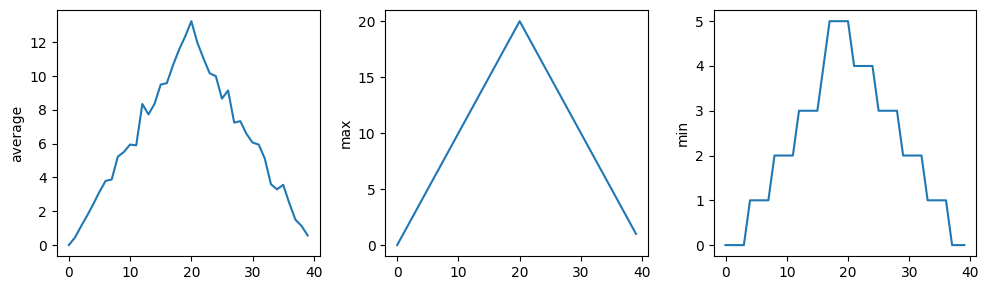

Suspicious looking maxima!
data\inflammation-02.csv


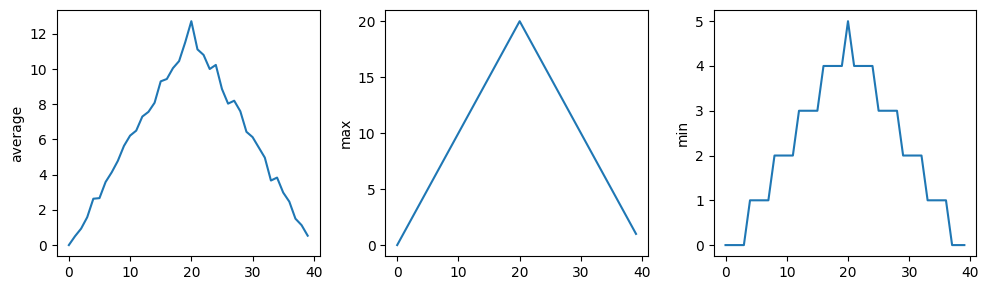

Suspicious looking maxima!
data\inflammation-03.csv


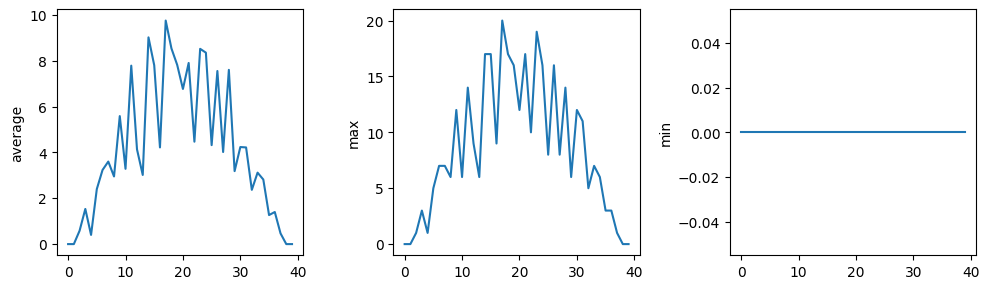

Minima add up to zero!


In [4]:
## Tidying Up
# Make a function to visualise our plots easily
import matplotlib
import matplotlib.pyplot
import numpy
import glob

def visualise(filename):
    data = numpy.loadtxt(fname = filename, delimiter = ',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.amax(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.amin(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

# Define another function called detect_problems to check for systematics we noticed
def detect_problems(filename):

    data = numpy.loadtxt(fname = filename, delimiter = ',')

    if numpy.amax(data, axis=0)[0] == 0 and numpy.amax(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif numpy.sum(numpy.amin(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems ok!')

# Use a for loop to apply the functions to our files
filenames = sorted(glob.glob('**/inflammation*.csv'))

for filename in filenames[:3]:
    print(filename)
    visualise(filename)
    detect_problems(filename)

In [22]:
## Testing and Documenting
# Write a function to offset a dataset so that its mean value shifts to a user-defined value
def offset_mean(data, target_mean_value):
    """Return a new array containing the original data with its mean offset to match the desired value."""
    return (data - numpy.mean(data)) + target_mean_value

# Create a matrix of 0's with numpy and offset its values to have a mean of 3
z = numpy.zeros((2,2))
print(offset_mean(z, 3))

# Try offset_mean on real data
data = numpy.loadtxt(fname='/Users/rebekah/python/software-carpentry-1/software-carpentry-1/data/inflammation-01.csv', delimiter=',')
print(offset_mean(data, 0))

[[3. 3.]
 [3. 3.]]
[[-6.14875 -6.14875 -5.14875 ... -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ... -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ... -4.14875 -5.14875 -5.14875]
 ...
 [-6.14875 -5.14875 -5.14875 ... -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ... -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ... -5.14875 -5.14875 -6.14875]]


In [19]:
# Do some tests to make sure it is correct
print('original min, mean, and max are:', numpy.amin(data), numpy.mean(data), numpy.amax(data))
offset_data = offset_mean(data, 0)
print('min, mean, and max of offset data are:',
      numpy.amin(offset_data),
      numpy.mean(offset_data),
      numpy.amax(offset_data))

original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and max of offset data are: -6.14875 2.842170943040401e-16 13.85125


In [21]:
# Check that the standard deviation hasn't changed
print('std dev before and after:', numpy.std(data), numpy.std(offset_data))
print('difference in std deviations before and after:', numpy.std(data) - numpy.std(offset_data))

std dev before and after: 4.613833197118566 4.613833197118566
difference in std deviations before and after: 0.0


In [24]:
# Returns the docstring we put in the offset_mean function
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data with its mean offset to match the desired value.



In [5]:
## Defining Defaults
# To make our functions easier to use, redefine offset_mean function
def offset_mean(data, target_mean_value=0.0):
    """Return a new array containing the original data with its mean offset to match the desired value, 0 by default.

    Examples
    ------------
    >>> offset_mean([1, 2, 3])
    array([-1., 0., 1.])
    """
    return (data - numpy.mean(data)) + target_mean_value

test_data = numpy.zeros((2, 2))
print(offset_mean(test_data, 3))

[[3. 3.]
 [3. 3.]]


In [6]:
# Calling the function with one parameter uses the default target_mean_value of 0
more_data = 5 + numpy.zeros((2, 2))
print('data before mean offset:')
print(more_data)
print('offset data:')
print(offset_mean(more_data))

data before mean offset:
[[5. 5.]
 [5. 5.]]
offset data:
[[0. 0.]
 [0. 0.]]


In [10]:
# The following example shows how Python matches values to parameters
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no parameters:')
display()
print('one parameter:')
display(123)
print('two parameters:')
display(123, 456)

# To only set the value of c:
print('only setting the value of c:')
display(c=789)

no parameters:
a: 1 b: 2 c: 3
one parameter:
a: 123 b: 2 c: 3
two parameters:
a: 123 b: 456 c: 3
only setting the value of c:
a: 1 b: 2 c: 789


In [11]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding=None, max_rows=None, *, quotechar=None, like=None)
    Load data from a text file.

    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must return bytes or strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    c

In [17]:
## Readable Functions
# Consider the following functions:
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))

data = [1, 2, 3]
print(s(data))
print(std_dev(data))

1.0
1.0


In [20]:
# Write a function called fence that wraps a character around a string
def fence(name, wrapper):
    return wrapper + name + wrapper

fence('hello', '*')

'*hello*'

In [29]:
# Write a function called outer which returns a string made of the first and last characters of the input
def outer(string):
    return string[0] + string[-1]

outer('Hi, my name is Rebekah')

'Hh'

In [36]:
# Write a function called rescale that takes an array as input and returns a corresponding array of values scaled to lie between 0.0 and 1.0
def rescale(input_array):
    L = numpy.amin(input_array)
    H = numpy.amax(input_array)
    output_array = (input_array - L) / (H - L)
    return output_array

data = [1, 2, 3, 4, 5]
rescale(data)

# Update the function so that it scales the data from 0 to 1 automatically, but will allow the user to specify lower and upper bounds if they want.
def rescale(input_array, low_val=0.0, high_val=1.0):
    ''' rescales input array values to lie between low_val and high_val'''
    L = numpy.amin(input_array)
    H = numpy.amax(input_array)
    intermed_array = (input_array - L) / (H - L)
    output_array = intermed_array * (high_val - low_val) + low_val
    return output_array

print(rescale(data))
print(rescale(data, 1., 2.))

[0.   0.25 0.5  0.75 1.  ]
[1.   1.25 1.5  1.75 2.  ]
